In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
train_mnist = torchvision.datasets.MNIST(root = ".",train = True,transform = transforms.ToTensor(),download = True)

In [3]:
train_mnist.data.shape

torch.Size([60000, 28, 28])

In [4]:
train_mnist.data


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
train_mnist.data.max()

tensor(255, dtype=torch.uint8)

In [6]:
train_mnist.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
test_mnist = torchvision.datasets.MNIST(root =".",train = False,download=True,transform = transforms.ToTensor())

In [8]:
test_mnist.data.shape

torch.Size([10000, 28, 28])

In [9]:
#model
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),nn.Linear(128,10))


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [12]:
#dataloader
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_mnist, batch_size = batch_size,shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_mnist, batch_size = batch_size,shuffle = False)

In [119]:
#dataloader testing
d_loader = torch.utils.data.DataLoader(dataset = train_mnist,batch_size = 1,shuffle = True)
for i,j in d_loader:
  print(i)
  print(i.shape)
  print(j)

  break


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
# #Training
TrainLoss = []
TestLoss = []
epoch_TrainLoss = []
epoch_TestLoss = []
epochs =10

for i in range(epochs):

  for inputs,targets in train_loader:

    inputs = inputs.to(device)
    targets = targets.to(device)

    inputs = inputs.view(-1,784)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs,targets)

    loss.backward()

    optimizer.step()

    TrainLoss.append(loss.item())

  epoch_trainloss = np.mean(TrainLoss)
  epoch_TrainLoss.append(epoch_trainloss)

  for inp,tar in test_loader:

    inp = inp.to(device)
    tar = tar.to(device)

    inp = inp.view(-1,784)

    out = model(inp)

    loss_test = criterion(out,tar)

    TestLoss.append(loss_test.item())

  epoch_testloss = np.mean(TestLoss)
  epoch_TestLoss.append(epoch_testloss)

  print(f"epoch{i+1}/{epochs}   training loss -- {epoch_trainloss}  test loss -- {epoch_testloss}")








epoch1/10   training loss -- 0.41566649271544615  test loss -- 0.22680520120112202
epoch2/10   training loss -- 0.30546612205154605  test loss -- 0.19339354411710666
epoch3/10   training loss -- 0.2508915055386971  test loss -- 0.17076723095430416
epoch4/10   training loss -- 0.21574577903831754  test loss -- 0.15479746992556861
epoch5/10   training loss -- 0.19053730415239897  test loss -- 0.14296921415437203
epoch6/10   training loss -- 0.1712407485920176  test loss -- 0.13449491555252377
epoch7/10   training loss -- 0.15577298995422864  test loss -- 0.12738339115708064
epoch8/10   training loss -- 0.1430157233974827  test loss -- 0.1208869430482059
epoch9/10   training loss -- 0.1322505613662094  test loss -- 0.11667815165406907
epoch10/10   training loss -- 0.12300164811203936  test loss -- 0.11292471903887624


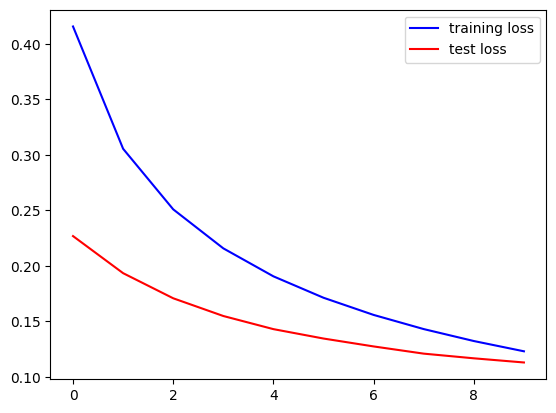

In [17]:
plt.plot(epoch_TrainLoss, label = "training loss",c = "blue")
plt.plot(epoch_TestLoss, label = "test loss", c= "red")
plt.legend()
plt.show()

In [30]:
#Accuracy

count_correct = 0
count_total =0

for inputs, targets in train_loader:

  inputs = inputs.to(device)
  targets = targets.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _,preds = torch.max(outputs,1)

  count_correct += (preds == targets).sum().item()

  count_total += targets.shape[0]


train_acc = count_correct/count_total

print("training accuaracy --", train_acc)

count_correct = 0
count_total = 0

for inputs, targets in test_loader:

  inputs= inputs.to(device)
  targets = targets.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _,preds = torch.max(outputs,1)

  count_correct += (preds==targets).sum().item()

  count_total += targets.shape[0]

test_acc = count_correct/count_total

print("test accuracy --", test_acc)





training accuaracy -- 0.9913666666666666
test accuracy -- 0.9756


In [25]:
#testing on the view function
for inputs,targets in train_loader:
  print(inputs.shape,targets.shape)
  inputs = inputs.view(-1,784)
  print(inputs.shape)
  break
 

torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 784])


In [31]:
torch.save(model.state_dict(),"MNIST_model")

In [32]:
!ls

MNIST  MNIST_model  sample_data


In [60]:
test_loader = torch.utils.data.DataLoader(dataset = test_mnist, batch_size = 10000,shuffle = False)

In [61]:
test_mnist.data.shape

torch.Size([10000, 28, 28])

In [70]:


for inputs, targets in test_loader:

  inputs= inputs.to(device)
  targets = targets.to(device)

  inputs = inputs.view(-1,784)

  outputs = model(inputs)

  _,preds = torch.max(outputs,1)

  print(len(preds))

 
  



10000


In [71]:
len(targets)

10000

In [72]:
targets = targets.cpu().numpy()
preds = preds.cpu().numpy()

In [77]:
idx = np.where(targets!=preds)

array([ 217,  247,  259,  321,  340,  381,  445,  495,  582,  619,  659,
        684,  691,  707,  720,  740,  882,  947,  951,  956,  965, 1014,
       1032, 1039, 1044, 1112, 1128, 1156, 1181, 1182, 1194, 1226, 1232,
       1242, 1247, 1260, 1272, 1289, 1299, 1319, 1326, 1328, 1393, 1496,
       1500, 1522, 1530, 1549, 1609, 1678, 1681, 1717, 1721, 1751, 1754,
       1790, 1828, 1871, 1901, 1941, 1984, 2004, 2016, 2024, 2035, 2040,
       2044, 2053, 2070, 2073, 2098, 2109, 2118, 2135, 2162, 2182, 2185,
       2224, 2272, 2293, 2299, 2329, 2369, 2387, 2405, 2406, 2408, 2414,
       2422, 2433, 2454, 2462, 2488, 2607, 2610, 2648, 2654, 2720, 2896,
       2915, 2939, 2953, 2995, 3005, 3030, 3073, 3117, 3422, 3451, 3474,
       3490, 3503, 3520, 3558, 3559, 3565, 3567, 3681, 3718, 3727, 3749,
       3751, 3757, 3776, 3780, 3796, 3808, 3811, 3818, 3838, 3850, 3853,
       3869, 3902, 3906, 3941, 3943, 3976, 4007, 4065, 4075, 4078, 4156,
       4163, 4176, 4199, 4224, 4248, 4289, 4350, 43

prediction 2
target 3


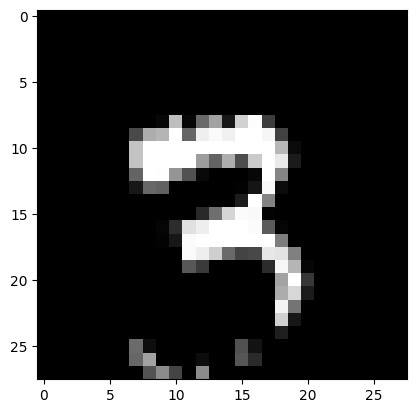

In [117]:
mis_idx = np.random.choice(idx[0])

print("prediction",preds[mis_idx])
print("target",targets[mis_idx])
plt.imshow(test_mnist.data[mis_idx],cmap = "gray")
plt.show()

